In [ ]:
from google.colab import drive
import os

# ربط Google Drive
drive.mount('/content/drive')
print("تم ربط Google Drive بنجاح.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
تم ربط Google Drive بنجاح.


In [ ]:
data_folder = '/content/drive/MyDrive/Divvy_Tripdata_Q2_2024_to_Q2_2025'

In [ ]:
if not os.path.exists(data_folder):
    print(f"خطأ: المجلد المحدد . Error: Specified folder '{data_folder}' غير موجود. يرجى التحقق من المسار.Missing. Verify path.")
else:
    print(f"المجلد المحدد للبيانات . Data Folder: {data_folder}")

print("\nتم إعداد البيئة الأولية. Initial Setup Done.")

المجلد المحدد للبيانات . Data Folder: /content/drive/MyDrive/Divvy_Tripdata_Q2_2024_to_Q2_2025

تم إعداد البيئة الأولية. Initial Setup Done.


In [ ]:
import sqlite3
import pandas as pd
import os
import glob

In [ ]:
db_name = 'cyclistic_data.db'
db_path = os.path.join(data_folder, db_name) # Ensure 'data_folder' is defined in Cell 1 # تأكد أن data_folder معرف من الخلية 1

In [ ]:
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

print(f"تم إنشاء اتصال بقاعدة البيانات . DB connection established:'{db_name}'.")

تم إنشاء اتصال بقاعدة البيانات . DB connection established:'cyclistic_data.db'.


In [ ]:
# الحصول على قائمة بجميع ملفات CSV في المجلد المحدد
csv_files = glob.glob(os.path.join(data_folder, '*.csv'))

print(f"(تم العثور على ) Discovered {len(csv_files)} CSV file in folder. (ملف CSV في المجلد.)")
if len(csv_files) == 0:
    print("Warning: No CSV files found. Please check the path and file existence.\nتحذير: لم يتم العثور على أي ملفات CSV. يرجى التحقق من المسار ووجود الملفات.")
    print(f"(المسار الحالي الذي تم البحث فيه:) Current search path: {data_folder}")
    # يمكن هنا إضافة خيار إنهاء التنفيذ إذا لم يتم العثور على ملفات حرجة:
    #Option to terminate execution if critical files are missing can be added here:
    # raise SystemExit("No CSV files to continue. \nلا توجد ملفات CSV للمتابعة.")

(تم العثور على ) Discovered 12 CSV file in folder. (ملف CSV في المجلد.)


In [ ]:
print("Commencing file upload to individual SQLite tables... \nبدء تحميل الملفات إلى جداول منفصلة في قاعدة بيانات SQLite...")

for file_path in csv_files: # Ensure 'csv_files' is defined in the preceding cell #تأكد أن csv_files معرف من الخلية السابقة
    file_base_name = os.path.basename(file_path)
    table_name = file_base_name.replace('.csv', '').replace('-', '_').replace(' ', '_').lower()

    try:
        # Read CSV to DataFrame with proper parameters #قراءة ملف CSV إلى DataFrame مع المعلمات الصحيحة
        df = pd.read_csv(file_path, header=0, quotechar='"', engine='python')
    except pd.errors.EmptyDataError:
        print(f"(تحذير: الملف) Warning: The file '{file_base_name}' is empty, skipping. (فارغ وسيتم تخطيه.)")
        continue
    except Exception as e:
        print(f"(خطأ في قراءة الملف) File read error '{file_base_name}': {e}")
        print(f"(السطر الأول من الملف) First line of file '{file_base_name}' might have a format issue. (قد يكون به مشكلة في التنسيق.)")
        continue

    # توحيد أسماء الأعمدة: استبدال المسافات بشرطات سفلية وتحويلها إلى أحرف صغيرة
    # Standardize column names: replace spaces with underscores, lowercase
    df.columns = [col.replace(' ', '_').lower() for col in df.columns]

    # تحميل DataFrame إلى جدول في قاعدة البيانات SQLite
    # Load DataFrame into SQLite table
    df.to_sql(table_name, conn, if_exists='replace', index=False)
    print(f"(تم تحميل الملف) File uploaded '{file_base_name}' (إلى الجدول) to table '{table_name}'.")

Commencing file upload to individual SQLite tables... 
بدء تحميل الملفات إلى جداول منفصلة في قاعدة بيانات SQLite...
(تم تحميل الملف) File uploaded '202406-divvy-tripdata.csv' (إلى الجدول) to table '202406_divvy_tripdata'.
(تم تحميل الملف) File uploaded '202407-divvy-tripdata.csv' (إلى الجدول) to table '202407_divvy_tripdata'.
(تم تحميل الملف) File uploaded '202408-divvy-tripdata.csv' (إلى الجدول) to table '202408_divvy_tripdata'.
(تم تحميل الملف) File uploaded '202409-divvy-tripdata.csv' (إلى الجدول) to table '202409_divvy_tripdata'.
(تم تحميل الملف) File uploaded '202410-divvy-tripdata.csv' (إلى الجدول) to table '202410_divvy_tripdata'.
(تم تحميل الملف) File uploaded '202411-divvy-tripdata.csv' (إلى الجدول) to table '202411_divvy_tripdata'.
(تم تحميل الملف) File uploaded '202412-divvy-tripdata.csv' (إلى الجدول) to table '202412_divvy_tripdata'.
(تم تحميل الملف) File uploaded '202501-divvy-tripdata.csv' (إلى الجدول) to table '202501_divvy_tripdata'.
(تم تحميل الملف) File uploaded '2025

In [ ]:
print("Finished loading all files into individual database tables. \nتم الانتهاء من تحميل جميع الملفات إلى جداول منفصلة في قاعدة البيانات.")

Finished loading all files into individual database tables. 
تم الانتهاء من تحميل جميع الملفات إلى جداول منفصلة في قاعدة البيانات.


In [ ]:
# الحصول على قائمة بأسماء الجداول التي تم تحميلها# # Retrieve loaded table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
data_tables = [table[0] for table in cursor.fetchall() if not table[0].startswith('sqlite_')]

print(f"\nDiscovered tables for merging(الجداول التي تم العثور عليها وستستخدم للدمج): {data_tables}")

# Checking Source Table Columns and Finding Common Ones
# فحص الأعمدة في الجداول المصدر وتحديد الأعمدة المشتركة
common_columns = set()
if data_tables:
    print(f"\nChecking source table columns and finding common ones... \n(فحص الأعمدة في الجداول المصدر وتحديد الأعمدة المشتركة...)")
    all_tables_columns = {}

    for i, table_name in enumerate(data_tables):
        cursor.execute(f"PRAGMA table_info(\"{table_name}\");")
        columns_info = cursor.fetchall()

        current_table_cols = {col[1] for col in columns_info}
        all_tables_columns[table_name] = current_table_cols

        if i == 0:
            common_columns = current_table_cols
        else:
            common_columns = common_columns.intersection(current_table_cols)

    common_columns = sorted(list(common_columns))

    if common_columns:
        print(f"\nThe common columns across all tables are (الأعمدة المشتركة الموجودة في جميع الجداول هي): {common_columns}")
    else:
        print("Warning: No shared columns detected in all tables. Merged table creation aborted. \nتحذير: لم يتم العثور على أعمدة مشتركة بين جميع الجداول. لن يتم إنشاء الجدول المدمج.")
        print("Columns per table (for diagnostic purposes): \n(أعمدة كل جدول (للتشخيص):)")
        for table, cols in all_tables_columns.items():
            print(f"- {table}: {cols}")
        data_tables = [] # Clear list to avoid merge # إفراغ القائمة لمنع محاولة الدمج

else:
    print("No monthly data tables found for verification. The merged table won't be created. \nلا توجد جداول بيانات شهرية للتحقق منها. لن يتم إنشاء الجدول المدمج.")


Discovered tables for merging(الجداول التي تم العثور عليها وستستخدم للدمج): ['combined_trips', '202406_divvy_tripdata', '202407_divvy_tripdata', '202408_divvy_tripdata', '202409_divvy_tripdata', '202410_divvy_tripdata', '202411_divvy_tripdata', '202412_divvy_tripdata', '202501_divvy_tripdata', '202502_divvy_tripdata', '202503_divvy_tripdata', '202504_divvy_tripdata', '202505_divvy_tripdata']

Checking source table columns and finding common ones... 
(فحص الأعمدة في الجداول المصدر وتحديد الأعمدة المشتركة...)

The common columns across all tables are (الأعمدة المشتركة الموجودة في جميع الجداول هي): ['end_lat', 'end_lng', 'end_station_id', 'end_station_name', 'ended_at', 'member_casual', 'ride_id', 'rideable_type', 'start_lat', 'start_lng', 'start_station_id', 'start_station_name', 'started_at']


In [ ]:
if data_tables and common_columns:
    print("\nCommencing merge query construction...\nبدء بناء استعلام الدمج...")

    select_statements = []
    for table_name in data_tables:
        select_statements.append(f"SELECT {', '.join(common_columns)} FROM \"{table_name}\"")

    union_query = " UNION ALL ".join(select_statements)
    print("The merge query has been successfully constructed.\nتم بناء استعلام الدمج بنجاح.")
else:
    print("No tables or common columns to build the merge query. This step will be skipped.\nلا توجد جداول أو أعمدة مشتركة لبناء استعلام الدمج. سيتم تخطي هذه الخطوة.")


Commencing merge query construction...
بدء بناء استعلام الدمج...
The merge query has been successfully constructed.
تم بناء استعلام الدمج بنجاح.


In [ ]:
if data_tables and common_columns: # Verify presence of tables and shared columns # تأكد أن هناك جداول وأعمدة مشتركة
    print("\nInitiating merge and cleaning of tables into combined_trips...\nبدء عملية دمج وتنظيف الجداول في combined_trips...")

    # Create combined_trips table from merged data with initial cleaning
    # إنشاء جدول combined_trips كناتج للدمج مع بعض التنظيف الأساسي
    create_combined_table_query = f"""
    CREATE TABLE IF NOT EXISTS combined_trips AS
    SELECT
        {', '.join(common_columns)}
    FROM
        ({union_query})
    WHERE
        started_at IS NOT NULL AND
        ended_at IS NOT NULL AND
        start_lat IS NOT NULL AND
        start_lng IS NOT NULL AND
        end_lat IS NOT NULL AND
        end_lng IS NOT NULL AND
        member_casual IS NOT NULL AND
        (julianday(ended_at) - julianday(started_at)) * 24 * 60 BETWEEN 1 AND (24 * 60) * 2;
    """
    print("\nDEBUG: The generated CREATE TABLE query is:\n")
    print(create_combined_table_query) # اطبع الاستعلام
    print("\nDEBUG: Attempting to execute CREATE TABLE query...")

    try:
        cursor.execute(create_combined_table_query)
        conn.commit()
        print("The 'combined_trips' table has been successfully created and populated.\nم إنشاء الجدول 'combined_trips' وتعبئته بنجاح.")

    except sqlite3.Error as e:
        print(f"(خطأ في إنشاء الجدول 'combined_trips':) Error creating 'combined_trips' table: {e}")
        print("Please check the column names in the original CSV files or the common columns.\nيرجى فحص أسماء الأعمدة في ملفات CSV الأصلية أو الأعمدة المشتركة.")
else:
    print("No monthly tables or common columns to merge. 'combined_trips' will not be created.\nلا توجد جداول شهرية أو أعمدة مشتركة لدمجها. لن يتم إنشاء 'combined_trips'.")


Initiating merge and cleaning of tables into combined_trips...
بدء عملية دمج وتنظيف الجداول في combined_trips...

DEBUG: The generated CREATE TABLE query is:


    CREATE TABLE IF NOT EXISTS combined_trips AS
    SELECT
        end_lat, end_lng, end_station_id, end_station_name, ended_at, member_casual, ride_id, rideable_type, start_lat, start_lng, start_station_id, start_station_name, started_at
    FROM
        (SELECT end_lat, end_lng, end_station_id, end_station_name, ended_at, member_casual, ride_id, rideable_type, start_lat, start_lng, start_station_id, start_station_name, started_at FROM "combined_trips" UNION ALL SELECT end_lat, end_lng, end_station_id, end_station_name, ended_at, member_casual, ride_id, rideable_type, start_lat, start_lng, start_station_id, start_station_name, started_at FROM "202406_divvy_tripdata" UNION ALL SELECT end_lat, end_lng, end_station_id, end_station_name, ended_at, member_casual, ride_id, rideable_type, start_lat, start_lng, start_station_id, star

In [ ]:
# عرض أول 5 صفوف من الجدول الجديد للتحقق وعدد الصفوف الإجمالي وإغلاق الاتصال

print("\nأول 5 صفوف من الجدول المدمج والمنظف:")

# --- تأكد أن هذه الأسطر موجودة هنا قبل كتلة try ---
# نقوم بتحديث قائمة الجداول للتأكد من أن 'combined_trips' يظهر فيها بعد إنشائه
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
data_tables_after_creation = [table[0] for table in cursor.fetchall() if not table[0].startswith('sqlite_')]
# ----------------------------------------------------

try:
    if 'combined_trips' in data_tables_after_creation:
        # قراءة جميع البيانات إلى DataFrame (سيستغرق هذا بعض الوقت والذاكرة)
        df_combined = pd.read_sql_query("SELECT * FROM combined_trips;", conn) # حذف LIMIT 5

        # الآن يمكنك طباعة أول 5 صفوف من الـ DataFrame المحمل بالكامل
        print("أول 5 صفوف من الـ DataFrame المحمل بالكامل:")
        print(df_combined.head().to_string())

        # الحصول على معلومات حول عدد الصفوف الإجمالي من الـ DataFrame المحمل
        total_rows_df = len(df_combined)
        print(f"\nإجمالي عدد الصفوف في الـ DataFrame المحمل: {total_rows_df}")

        # الآن يمكنك بسهولة طباعة آخر 5 صفوف
        print("\nآخر 5 صفوف من الـ DataFrame المحمل بالكامل:")
        print(df_combined.tail().to_string())

        # ويمكنك أيضاً طباعة عينة عشوائية (مثلاً 10 صفوف)
        print("\n10 صفوف عشوائية من الـ DataFrame المحمل بالكامل:")
        print(df_combined.sample(10).to_string())
    else:
        # رسالة في حال لم يتم العثور على الجدول (رغم محاولة الإنشاء)
        print("تحذير: لم يتم العثور على الجدول 'combined_trips' بعد محاولة الإنشاء.")
        print("يرجى التأكد من تشغيل جميع الخلايا السابقة بنجاح أو إعادة تشغيل وقت التشغيل بالكامل.")

except pd.io.sql.DatabaseError as e:
    print(f"خطأ في الاستعلام عن الجدول 'combined_trips': {e}")
    print("يرجى التأكد من أن الاتصال بقاعدة البيانات نشط وأن الجدول 'combined_trips' قد تم إنشاؤه بنجاح.")
except Exception as e:
    print(f"حدث خطأ غير متوقع: {e}")


أول 5 صفوف من الجدول المدمج والمنظف:
أول 5 صفوف من الـ DataFrame المحمل بالكامل:
   end_lat  end_lng end_station_id end_station_name                 ended_at member_casual           ride_id  rideable_type  start_lat  start_lng start_station_id start_station_name               started_at
0    41.89   -87.65           None             None  2024-06-11 17:21:39.464        casual  CDE6023BE6B11D2F  electric_bike      41.89     -87.65             None               None  2024-06-11 17:20:06.289
1    41.94   -87.65           None             None  2024-06-11 17:30:13.035        casual  9CFB6A858D23ABF7  electric_bike      41.93     -87.65             None               None  2024-06-11 17:25:27.089
2    41.88   -87.64           None             None  2024-06-11 12:08:13.382        casual  6365EFEB64231153  electric_bike      41.88     -87.64             None               None  2024-06-11 11:53:50.769
3    41.93   -87.64           None             None  2024-06-11 00:20:35.287        casual

In [ ]:
# --- 1.1: معلومات عامة عن DataFrame (أنواع البيانات والقيم غير المفقودة) ---
print("--- معلومات عامة عن DataFrame (df_combined.info()) ---")
df_combined.info()

# --- 1.2: الإحصائيات الوصفية للأعمدة الرقمية ---
print("\n--- الإحصائيات الوصفية للأعمدة الرقمية (df_combined.describe()) ---")
print(df_combined.describe().to_string())

# --- 1.3: التحقق من القيم المفقودة لكل عمود ---
print("\n--- عدد القيم المفقودة لكل عمود (df_combined.isnull().sum()) ---")
print(df_combined.isnull().sum().to_string())

--- معلومات عامة عن DataFrame (df_combined.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499423 entries, 0 to 5499422
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   end_lat             float64
 1   end_lng             float64
 2   end_station_id      object 
 3   end_station_name    object 
 4   ended_at            object 
 5   member_casual       object 
 6   ride_id             object 
 7   rideable_type       object 
 8   start_lat           float64
 9   start_lng           float64
 10  start_station_id    object 
 11  start_station_name  object 
 12  started_at          object 
dtypes: float64(4), object(9)
memory usage: 545.4+ MB

--- الإحصائيات الوصفية للأعمدة الرقمية (df_combined.describe()) ---
            end_lat       end_lng     start_lat     start_lng
count  5.499423e+06  5.499423e+06  5.499423e+06  5.499423e+06
mean   4.190254e+01 -8.764645e+01  4.190213e+01 -8.764620e+01
std    5.643487e-02  1.17055

In [ ]:
# --- 2.1: تحويل أعمدة التاريخ والوقت إلى datetime ---
print("--- تحويل أعمدة 'started_at' و 'ended_at' إلى تنسيق datetime ---")
df_combined['started_at'] = pd.to_datetime(df_combined['started_at'])
df_combined['ended_at'] = pd.to_datetime(df_combined['ended_at'])
print("تم تحويل الأعمدة بنجاح.")

# التحقق من أنواع البيانات الجديدة
print("\nأنواع البيانات بعد التحويل:")
print(df_combined[['started_at', 'ended_at']].dtypes.to_string())

# --- 2.2: حساب مدة الرحلة بالثواني ---
print("\n--- حساب مدة الرحلة (ride_length) بالثواني ---")
df_combined['ride_length'] = (df_combined['ended_at'] - df_combined['started_at']).dt.total_seconds()
print("تم حساب عمود 'ride_length' بالثواني.")

# --- 2.3: التحقق من وجود قيم سالبة أو صفرية في مدة الرحلة (بعد التنظيف) ---
print("\n--- التحقق من القيم غير المنطقية في 'ride_length' ---")
# القيم السالبة أو الصفرية (رحلات بدأت وانتهت في نفس اللحظة أو انتهت قبل أن تبدأ)
invalid_rides = df_combined[df_combined['ride_length'] <= 0]
print(f"عدد الرحلات بمدة <= 0 ثانية (غير منطقية): {len(invalid_rides)}")

# يمكنك عرض بعض هذه الرحلات إذا كانت موجودة (للتأكد)
# if not invalid_rides.empty:
#    print("أمثلة على رحلات بمدة غير منطقية:")
#    print(invalid_rides.head().to_string())

# --- 2.4: تحويل مدة الرحلة إلى دقائق (إذا لزم الأمر) ---
print("\n--- تحويل مدة الرحلة إلى دقائق (لتحليل أسهل) ---")
df_combined['ride_length_minutes'] = df_combined['ride_length'] / 60
print("تم حساب عمود 'ride_length_minutes'.")

# عرض إحصائيات سريعة لعمود مدة الرحلة بالدقائق
print("\nإحصائيات عمود 'ride_length_minutes':")
print(df_combined['ride_length_minutes'].describe().to_string())

--- تحويل أعمدة 'started_at' و 'ended_at' إلى تنسيق datetime ---
تم تحويل الأعمدة بنجاح.

أنواع البيانات بعد التحويل:
started_at    datetime64[ns]
ended_at      datetime64[ns]

--- حساب مدة الرحلة (ride_length) بالثواني ---
تم حساب عمود 'ride_length' بالثواني.

--- التحقق من القيم غير المنطقية في 'ride_length' ---
عدد الرحلات بمدة <= 0 ثانية (غير منطقية): 0

--- تحويل مدة الرحلة إلى دقائق (لتحليل أسهل) ---
تم حساب عمود 'ride_length_minutes'.

إحصائيات عمود 'ride_length_minutes':
count    5.499423e+06
mean     1.533252e+01
std      3.093325e+01
min      1.000017e+00
25%      5.670975e+00
50%      9.728183e+00
75%      1.705055e+01
max      1.499947e+03


In [ ]:
# --- 2.5: عرض عينة من البيانات بعد إضافة عمود 'ride_length_minutes' ---
print("--- أول 5 صفوف من الـ DataFrame بعد إضافة مدة الرحلة ---")
# لعرض الأعمدة الأكثر صلة بالتغييرات
print(df_combined[['started_at', 'ended_at', 'ride_length', 'ride_length_minutes', 'member_casual', 'rideable_type']].head().to_string())

print("\n--- آخر 5 صفوف من الـ DataFrame بعد إضافة مدة الرحلة ---")
# لعرض الأعمدة الأكثر صلة بالتغييرات
print(df_combined[['started_at', 'ended_at', 'ride_length', 'ride_length_minutes', 'member_casual', 'rideable_type']].tail().to_string())

print("\n--- 10 صفوف عشوائية من الـ DataFrame بعد إضافة مدة الرحلة ---")
# لعرض الأعمدة الأكثر صلة بالتغييرات
print(df_combined[['started_at', 'ended_at', 'ride_length', 'ride_length_minutes', 'member_casual', 'rideable_type']].sample(10).to_string())

--- أول 5 صفوف من الـ DataFrame بعد إضافة مدة الرحلة ---
               started_at                ended_at  ride_length  ride_length_minutes member_casual  rideable_type
0 2024-06-11 17:20:06.289 2024-06-11 17:21:39.464       93.175             1.552917        casual  electric_bike
1 2024-06-11 17:25:27.089 2024-06-11 17:30:13.035      285.946             4.765767        casual  electric_bike
2 2024-06-11 11:53:50.769 2024-06-11 12:08:13.382      862.613            14.376883        casual  electric_bike
3 2024-06-11 00:14:00.716 2024-06-11 00:20:35.287      394.571             6.576183        casual  electric_bike
4 2024-06-11 18:22:23.556 2024-06-11 19:26:41.817     3858.261            64.304350        casual  electric_bike

--- آخر 5 صفوف من الـ DataFrame بعد إضافة مدة الرحلة ---
                     started_at                ended_at  ride_length  ride_length_minutes member_casual  rideable_type
5499418 2025-05-16 10:43:14.778 2025-05-16 11:05:16.517     1321.739            22.02898

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499423 entries, 0 to 5499422
Data columns (total 15 columns):
 #   Column               Dtype         
---  ------               -----         
 0   end_lat              float64       
 1   end_lng              float64       
 2   end_station_id       object        
 3   end_station_name     object        
 4   ended_at             datetime64[ns]
 5   member_casual        object        
 6   ride_id              object        
 7   rideable_type        object        
 8   start_lat            float64       
 9   start_lng            float64       
 10  start_station_id     object        
 11  start_station_name   object        
 12  started_at           datetime64[ns]
 13  ride_length          float64       
 14  ride_length_minutes  float64       
dtypes: datetime64[ns](2), float64(6), object(7)
memory usage: 629.4+ MB


In [ ]:
df_combined.describe()

,end_lat,end_lng,ended_at,start_lat,start_lng,started_at,ride_length,ride_length_minutes
count,5.499423e+06,5.499423e+06,5499423,5.499423e+06,5.499423e+06,5499423,5.499423e+06,5.499423e+06
mean,4.190254e+01,-8.764645e+01,2024-10-24 12:01:27.904243968,4.190213e+01,-8.764620e+01,2024-10-24 11:46:07.953295616,9.199509e+02,1.533252e+01
min,1.606000e+01,-1.440500e+02,2024-06-01 00:00:02.288000,4.164000e+01,-8.791000e+01,2024-05-31 11:03:57.427000,6.000100e+01,1.000017e+00
25%,4.188096e+01,-8.766000e+01,2024-07-30 08:03:20.295000064,4.188096e+01,-8.766000e+01,2024-07-30 07:50:53.474500096,3.402585e+02,5.670975e+00
50%,4.189766e+01,-8.764275e+01,2024-09-21 17:15:15.321999872,4.189675e+01,-8.764175e+01,2024-09-21 16:57:18.568999936,5.836910e+02,9.728183e+00
75%,4.193000e+01,-8.762954e+01,2025-01-14 15:22:59.291500032,4.192955e+01,-8.762954e+01,2025-01-14 15:13:04.934499840,1.023033e+03,1.705055e+01
max,8.796000e+01,1.525300e+02,2025-05-31 23:59:49.905000,4.207000e+01,-8.752000e+01,2025-05-31 23:57:03.530000,8.999684e+04,1.499947e+03
std,5.643487e-02,1.170554e-01,NaN,4.447436e-02,2.737504e-02,NaN,1.855995e+03,3.093325e+01


In [ ]:
df_combined.isnull().sum()

,0
end_lat,0
end_lng,0
end_station_id,1010190
end_station_name,1010190
ended_at,0
member_casual,0
ride_id,0
rideable_type,0
start_lat,0
start_lng,0


In [ ]:
# تحديد النطاقات الجغرافية لشيكاغو
CHICAGO_LAT_MIN = 41.6
CHICAGO_LAT_MAX = 42.1
CHICAGO_LNG_MIN = -87.9
CHICAGO_LNG_MAX = -87.5

# تصفية الـ DataFrame بناءً على هذه النطاقات
# سنقوم بإنشاء نسخة جديدة من DataFrame بعد التصفية لتجنب تحذيرات SettingWithCopyWarning
df_cleaned = df_combined[
    (df_combined['start_lat'] >= CHICAGO_LAT_MIN) &
    (df_combined['start_lat'] <= CHICAGO_LAT_MAX) &
    (df_combined['start_lng'] >= CHICAGO_LNG_MIN) &
    (df_combined['start_lng'] <= CHICAGO_LNG_MAX) &
    (df_combined['end_lat'] >= CHICAGO_LAT_MIN) &
    (df_combined['end_lat'] <= CHICAGO_LAT_MAX) &
    (df_combined['end_lng'] >= CHICAGO_LNG_MIN) &
    (df_combined['end_lng'] <= CHICAGO_LNG_MAX)
].copy()

# عرض عدد الصفوف قبل وبعد التصفية
print(f"عدد الصفوف قبل تصفية القيم الشاذة في خطوط الطول والعرض: {len(df_combined)}")
print(f"عدد الصفوف بعد تصفية القيم الشاذة في خطوط الطول والعرض: {len(df_cleaned)}")

# يمكنك أيضاً التحقق من الإحصائيات الوصفية الجديدة للأعمدة بعد التصفية
print("\nالإحصائيات الوصفية لأعمدة خطوط الطول والعرض بعد التصفية:")
print(df_cleaned[['start_lat', 'start_lng', 'end_lat', 'end_lng']].describe())

عدد الصفوف قبل تصفية القيم الشاذة في خطوط الطول والعرض: 5499423
عدد الصفوف بعد تصفية القيم الشاذة في خطوط الطول والعرض: 5499290

الإحصائيات الوصفية لأعمدة خطوط الطول والعرض بعد التصفية:
          start_lat     start_lng       end_lat       end_lng
count  5.499290e+06  5.499290e+06  5.499290e+06  5.499290e+06
mean   4.190213e+01 -8.764620e+01  4.190253e+01 -8.764649e+01
std    4.447357e-02  2.737437e-02  4.464129e-02  2.753827e-02
min    4.164000e+01 -8.790000e+01  4.161000e+01 -8.790000e+01
25%    4.188096e+01 -8.766000e+01  4.188096e+01 -8.766000e+01
50%    4.189675e+01 -8.764175e+01  4.189766e+01 -8.764275e+01
75%    4.192955e+01 -8.762954e+01  4.193000e+01 -8.762954e+01
max    4.207000e+01 -8.752000e+01  4.210000e+01 -8.750000e+01


In [ ]:
# التحقق من القيم المفقودة في df_cleaned بعد تصفية خطوط الطول والعرض
print("\nالقيم المفقودة في الأعمدة بعد تصفية خطوط الطول والعرض:")
print(df_cleaned.isnull().sum())


القيم المفقودة في الأعمدة بعد تصفية خطوط الطول والعرض:
end_lat                      0
end_lng                      0
end_station_id         1010057
end_station_name       1010057
ended_at                     0
member_casual                0
ride_id                      0
rideable_type                0
start_lat                    0
start_lng                    0
start_station_id       1008112
start_station_name     1008112
started_at                   0
ride_length                  0
ride_length_minutes          0
dtype: int64


In [ ]:
# تحليل القيم المفقودة في أسماء محطات البدء
missing_start_station_df = df_cleaned[df_cleaned['start_station_name'].isnull()]

print(f"\nعدد الصفوف التي تحتوي على قيم مفقودة في 'start_station_name': {len(missing_start_station_df)}")
print("\nتوزيع أنواع الدراجات للرحلات ذات محطات البدء المفقودة:")
print(missing_start_station_df['rideable_type'].value_counts())


عدد الصفوف التي تحتوي على قيم مفقودة في 'start_station_name': 1008112

توزيع أنواع الدراجات للرحلات ذات محطات البدء المفقودة:
rideable_type
electric_bike       943823
electric_scooter     64289
Name: count, dtype: int64


In [ ]:
df_cleaned['member_casual'].value_counts()

,count
member_casual,
member,3505607
casual,1993683


In [ ]:
df_cleaned['rideable_type'].value_counts()

,count
rideable_type,
electric_bike,2954751
classic_bike,2406956
electric_scooter,137583


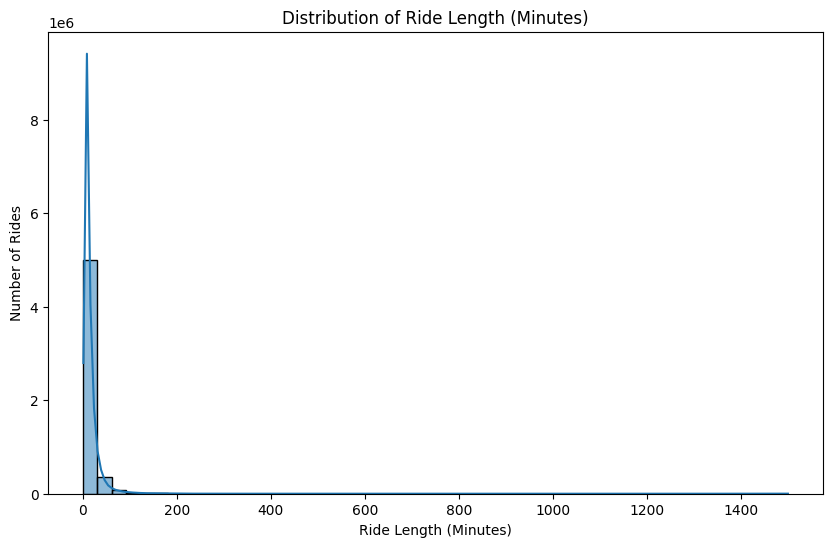

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# الآن تشغيل الكود الخاص بالـ Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['ride_length_minutes'], bins=50, kde=True)
plt.title('Distribution of Ride Length (Minutes)')
plt.xlabel('Ride Length (Minutes)')
plt.ylabel('Number of Rides')
plt.show()

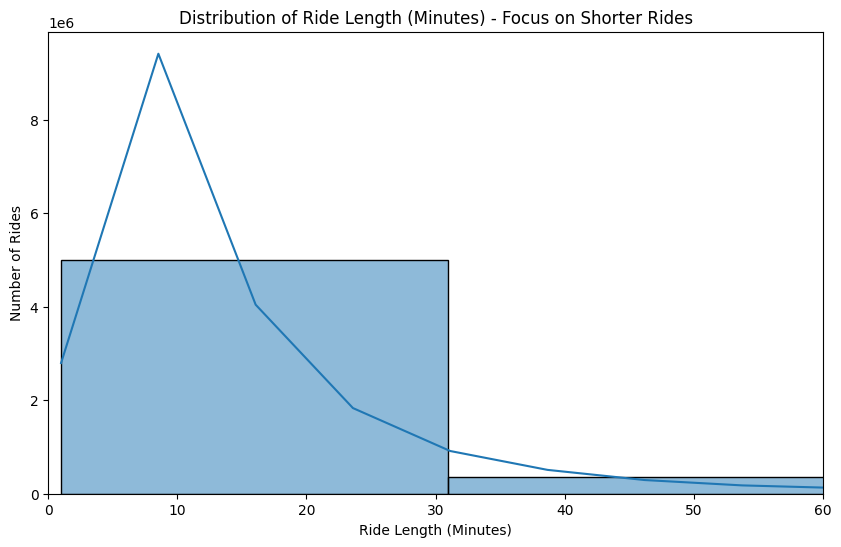

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['ride_length_minutes'], bins=50, kde=True)
plt.title('Distribution of Ride Length (Minutes) - Focus on Shorter Rides')
plt.xlabel('Ride Length (Minutes)')
plt.ylabel('Number of Rides')
plt.xlim(0, 60) # تحديد نطاق محور X ليظهر الرحلات حتى 60 دقيقة فقط
plt.show()

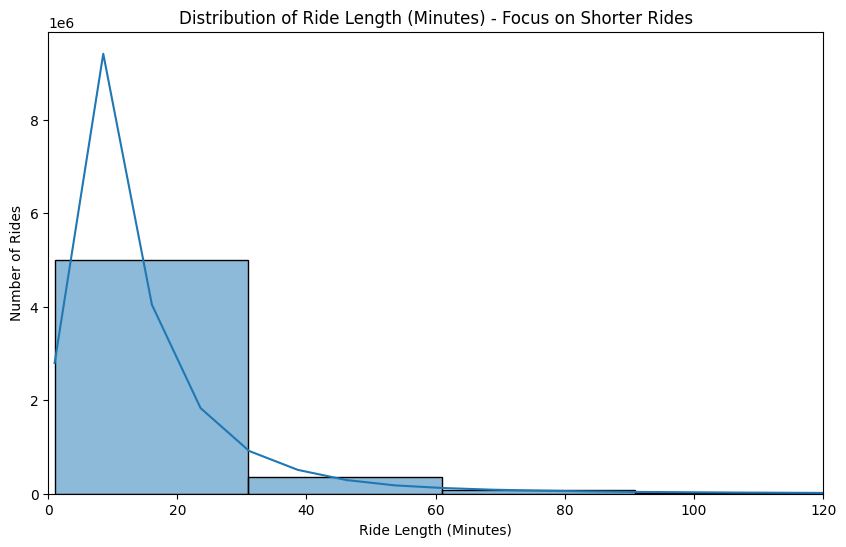

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['ride_length_minutes'], bins=50, kde=True)
plt.title('Distribution of Ride Length (Minutes) - Focus on Shorter Rides')
plt.xlabel('Ride Length (Minutes)')
plt.ylabel('Number of Rides')
plt.xlim(0, 120) # تحديد نطاق محور X ليظهر الرحلات حتى 120 دقيقة فقط
plt.show()

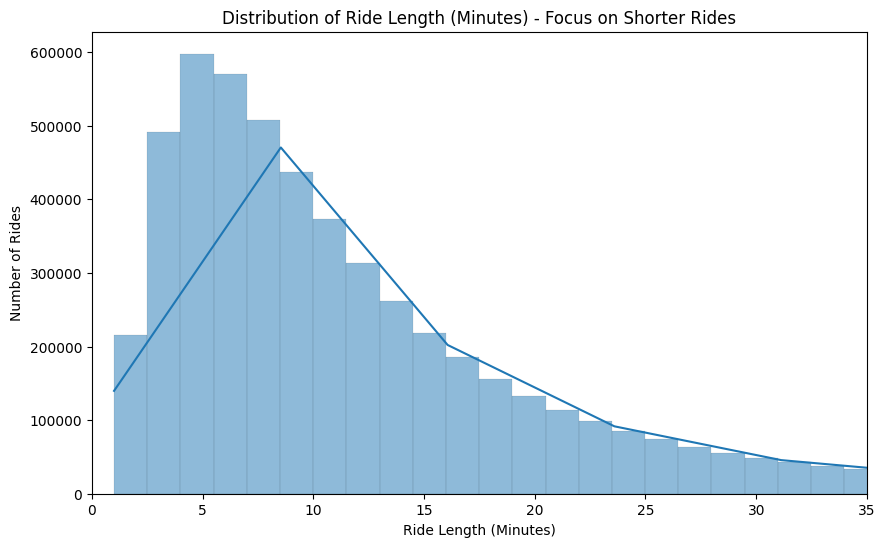

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['ride_length_minutes'], bins=1000, kde=True)
plt.title('Distribution of Ride Length (Minutes) - Focus on Shorter Rides')
plt.xlabel('Ride Length (Minutes)')
plt.ylabel('Number of Rides')
plt.xlim(0, 35) # تحديد نطاق محور X ليظهر الرحلات حتى 35 دقيقة فقط
plt.show()

In [ ]:
# حساب متوسط مدة الرحلة لكل نوع عضوية
avg_ride_length_by_member_type = df_cleaned.groupby('member_casual')['ride_length_minutes'].mean()
print("متوسط مدة الرحلة بالدقائق حسب نوع العضوية:")
print(avg_ride_length_by_member_type)

متوسط مدة الرحلة بالدقائق حسب نوع العضوية:
member_casual
casual    20.993319
member    12.112566
Name: ride_length_minutes, dtype: float64


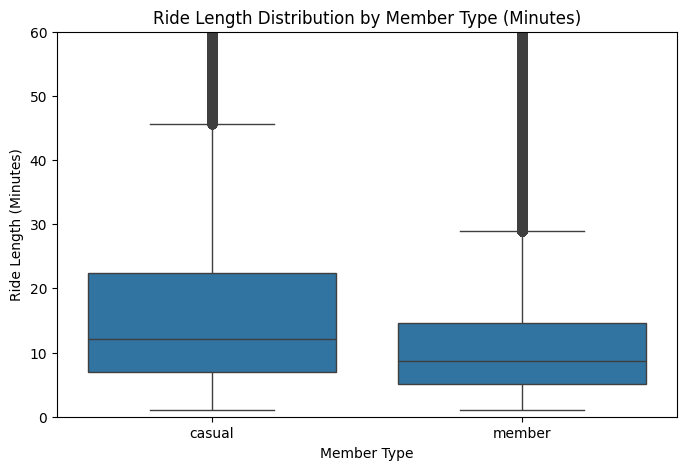

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='member_casual', y='ride_length_minutes', data=df_cleaned)
plt.title('Ride Length Distribution by Member Type (Minutes)')
plt.xlabel('Member Type')
plt.ylabel('Ride Length (Minutes)')
plt.ylim(0, 60) # تحديد نطاق Y ليظهر الرحلات حتى 60 دقيقة فقط
plt.show()


عدد الرحلات حسب ساعة البدء ونوع العضوية:
member_casual  casual  member
start_hour                   
0               34068   30954
1               22567   19070
2               14073   10907
3                7870    7545
4                6389    8384
5               11540   33149
6               27722   97873
7               51083  191424
8               71991  245476
9               71992  166302
10              87499  145259
11             111237  168417
12             130054  191834
13             135493  190014
14             141842  191283
15             156915  238011
16             176603  327569
17             188616  372348
18             161608  289885
19             118316  202105
20              86176  140307
21              72268  108842
22              62837   78944
23              44924   49705


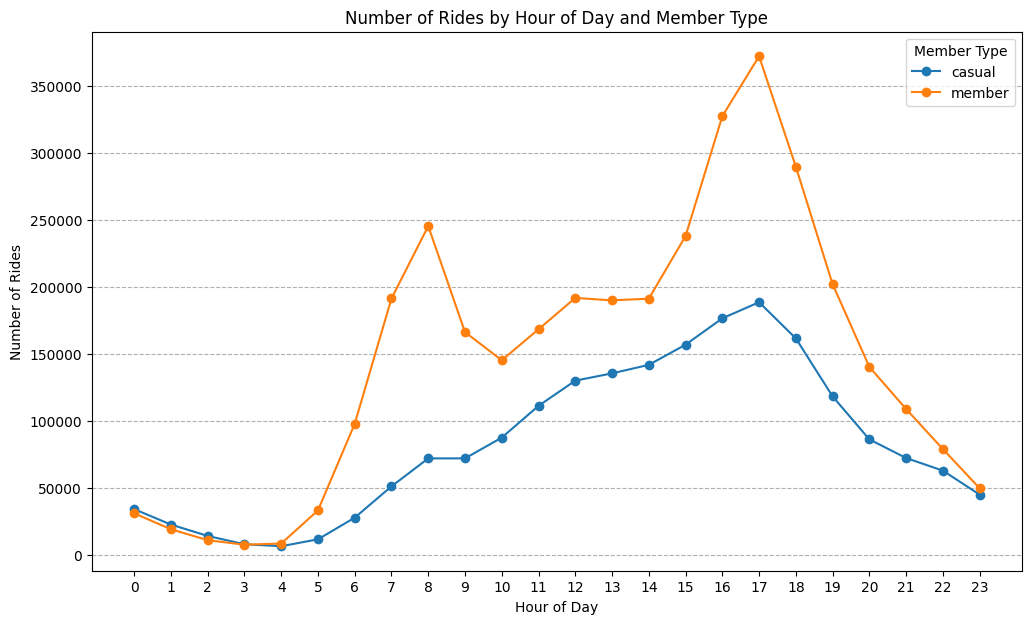

In [ ]:
# استخلاص ساعة البدء
df_cleaned['start_hour'] = df_cleaned['started_at'].dt.hour

# حساب عدد الرحلات حسب ساعة البدء ونوع العضوية
rides_by_hour_member_casual = df_cleaned.groupby(['start_hour', 'member_casual']).size().unstack(fill_value=0)
print("\nعدد الرحلات حسب ساعة البدء ونوع العضوية:")
print(rides_by_hour_member_casual)

# تصور باستخدام Line Plot (أو Bar Plot)
rides_by_hour_member_casual.plot(kind='line', figsize=(12, 7), marker='o')
plt.title('Number of Rides by Hour of Day and Member Type')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.legend(title='Member Type')
plt.show()


توزيع أنواع الدراجات حسب نوع العضوية:
rideable_type  classic_bike  electric_bike  electric_scooter
member_casual                                               
casual               869839        1042394             81450
member              1537117        1912357             56133


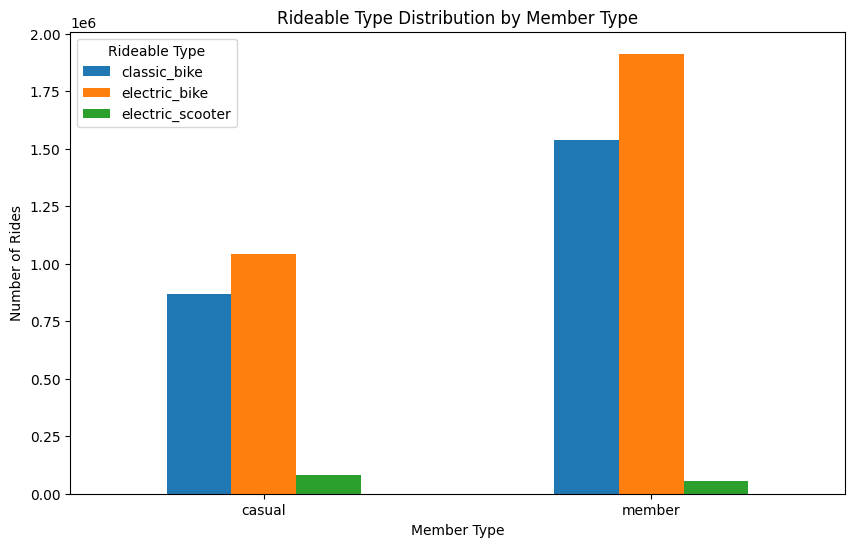

In [ ]:
# توزيع أنواع الدراجات حسب نوع العضوية
rideable_type_by_member = df_cleaned.groupby(['member_casual', 'rideable_type']).size().unstack(fill_value=0)
print("\nتوزيع أنواع الدراجات حسب نوع العضوية:")
print(rideable_type_by_member)

# تصور باستخدام Bar Plot
rideable_type_by_member.plot(kind='bar', figsize=(10, 6))
plt.title('Rideable Type Distribution by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.legend(title='Rideable Type')
plt.show()